# Assignment : Python intro and linear regression 

# 2.  Linear regression with scikit-learn (10 pt)

### 2.1.    Task 1: Random numbers

**(1). np.random.randn(npoints)**

- i/p : npoints : user defined shape (d1, d2,.. dn)
- o/p: number of points with shape (d1, d2,.. dn) which are drawn from a Standard Normal distribution

Example   
- if dimension of npoints is scalar, then from single variable Normal distribution (which is our case)
- if dimension of npoints is 2, then from double variable Normaldistribution

**Usage in our example**:

y_data = f(x, m, b).flatten() + np.random.randn(npoints) * dmax 

y_orig = f(x, m, b).flatten()

y_orig is the ground truth which we want to model using the linear regression. 
y_data is generated with the groud truth plus a gausian noise in data points which is being generated by np.random.randn(npoints) * dmax

------------------

**(2) ShuffleSplit:**

The ShuffleSplit in sklearn is an iterator used to generate indices which uses cross-validation approch to divide the whole dataset into training and test set. ShuffleSplit method is similar to k-fold with a difference of selecting test set (or train set) by taking random permutations of the data samples in contrast of consequtive test sets in k-fold cross-validation.

sklearn.model_selection.ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)

**Usage in our example**:
rs = ShuffleSplit(n_splits=1, test_size=.1, random_state=0)

**n_splits** : the number of times the data is splitted to training and test set. And the final prediction score is the average of all splitted data combination. Therfore, in our case, we are doing only one time splitting.

**test_size**: The portion-size of data set. Our test set size would be 100 * 0.1 = 10 samples

**random_state**: For given a perticular number, it will always produce the same random number. If None, Everytime new random points are generated.

## 2.2.      Task 2: Model

**Write down the linear model used in the regression.**
The linear model used in regression is linear_model.LinearRegression()
It is a linear model of y = W.X = w1 x + w0 
reg = linear_model.LinearRegression()

**How are the parameters that correspond to the weights retrieved in the python model?**

In our python model,the weights are retried by fitting the model on training data with corresponding label y_train. 

reg.fit(x[train],y_data[train])

The weights of the model are
m_fit = reg.coef_[0]         
b_fit = reg.intercept_

**Which python function is used to make predictions with the fitted model?**
y_pred_test = reg.predict(x[test])

reg.predict(X)
X : array-like or sparse matrix, shape (n_samples, n_features) Samples.

returns: predicted values, array, shape (n_samples,)

## 2.3. Task 3 : Coefficient of determination

- The coefficient of determination $R^2$ is given by $1 - \frac{u}{v}$ where u = $\sum(y_{true} - y_{pred})^ 2 $ and v = $\sum(y_{true} - mean(y_{true}))^ 2 $ 

- The value of $R^2$ = 1 means that u= 0 or the model makes correct predictions $y_{true} = y_{pred}$

- The value of $R^2$ = 0 means that u = v or the model always predicts the mean value of ground truth values and is a constant model.



## 2.4. Task 4 : Dataset

In [36]:
# calculated Values
d = [ 1, 10, 20]
R2 = [0.99970, 0.97574, 0.90261]
MSE_train = [0.87587, 84.05226, 336.40349] 
MSE_test = [1.19133, 103.63744, 459.87174]

MAE_train = [ 0.72503, 7.23899, 14.68646]
MAE_test = [0.91099 ,8.47159, 17.60235]

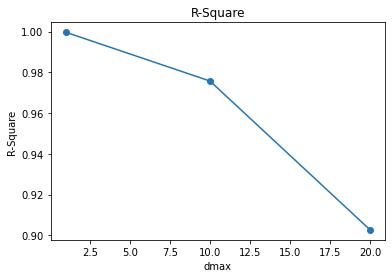

In [37]:
plt.plot ( d, R2, marker = 'o')
plt.xlabel("dmax")
plt.ylabel("R-Square")
plt.title('R-Square')
plt.show()

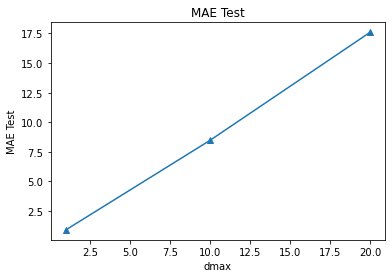

In [38]:
plt.plot ( d, MAE_test, marker = '^')
plt.xlabel("dmax")
plt.ylabel("MAE Test")
plt.title('MAE Test')
plt.show()

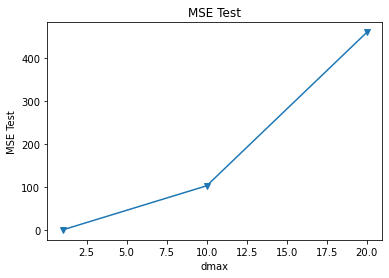

In [39]:
plt.plot ( d, MSE_test, marker = 'v')
plt.xlabel("dmax")
plt.ylabel("MSE Test")
plt.title('MSE Test')
plt.show()

Since in  our code:
**y_data = f(x, m, b).flatten() + np.random.randn(npoints) * dmax**

dmax corresponds to scale of randomness in our data or how the y_values would be scattered around the mean value calculated via f(x, m, b). 

Increase in dmax increases MSE and MAE since we are adding more randomness in data.

Increase in damx decreases R-Square value. Since $R^2$ is given by $1 - \frac{u}{v}$ where u = $\sum(y_{true} - y_{pred})^ 2 $ and v = $\sum(y_{true} - mean(y_{true}))^ 2 $,
means  \frac{u}{v} is increasing. since the $R^2$ score tells us how much independent variable x can explain the other dependent variable. So with increased randomness, $R^2$ score should decrease.


# 3. Diabetes dataset (10 pt)

## 3.1. Task 1 --  Fitting

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit

In [41]:
from sklearn import datasets
# load diabetes dataset (all data have been mean centered and scaled by the standard deviation times n_samples)

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [42]:
xcol=['age','sex','body mass index','average blood pressure','total serum cholesterol','low-density lipoproteins','high-density lipoproteins', 'total cholesterol/HDL','serum triglycerides level','blood surgar level']

# randomly assign 80% of the data to the training set and the remaining 20% to the test set
rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=0)
for train, test in rs.split(diabetes_X):
    train = train
    test = test

## Fit, prediction and scores

In [43]:
y_pred_all, y_pred_test, y_pred_train, r2, mse_test, mse_train, mae_test, mae_train  = [],[],[],[],[],[],[],[]

for i in range(10):
    col = i
    data_x = diabetes_X[:,col].reshape(-1, 1)
    data_y = diabetes_y
    
    reg = linear_model.LinearRegression()
    reg.fit(data_x[train],data_y[train])
    
    y_pred_all.append(reg.predict(data_x))         
    y_pred_test.append(reg.predict(data_x[test]))
    y_pred_train.append(reg.predict(data_x[train]))
    
    r2.append(r2_score(data_y[test],y_pred_test[i]))
    mse_test.append(mean_squared_error(data_y[test],y_pred_test[i]))
    mse_train.append(mean_squared_error(data_y[train],y_pred_train[i]))
    mae_test.append(mean_absolute_error(data_y[test],y_pred_test[i]))
    mae_train.append(mean_absolute_error(data_y[train],y_pred_train[i]))

## visulisation for prediction

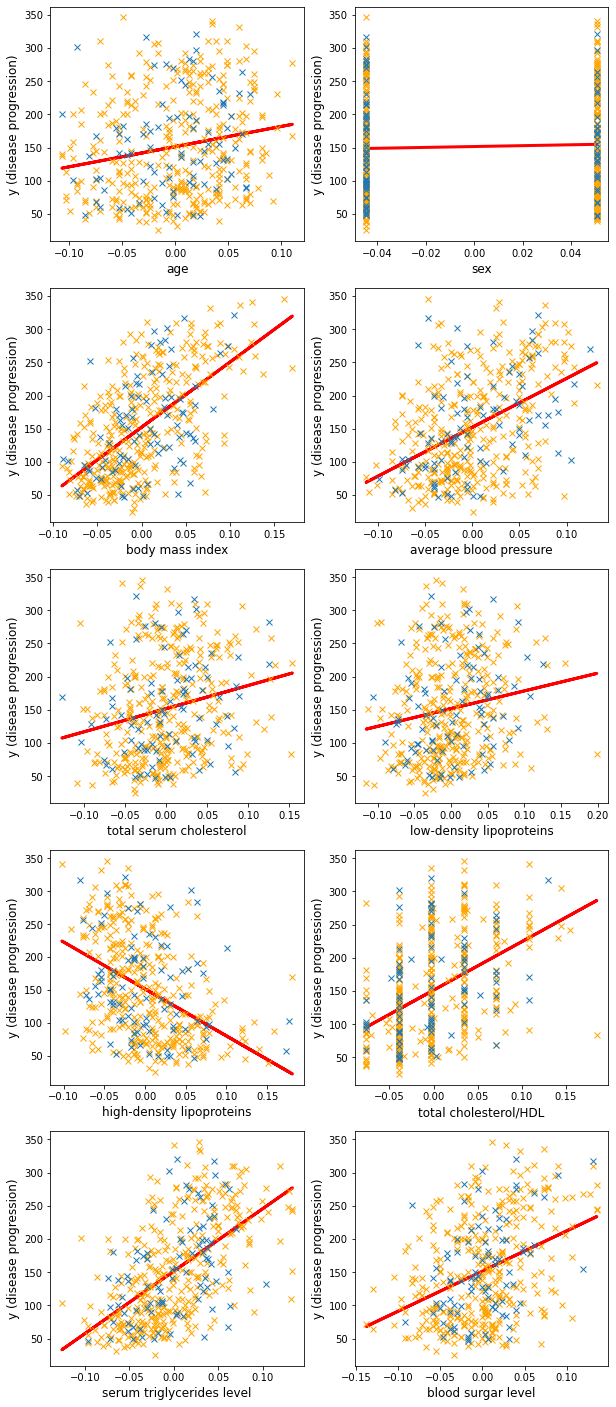

In [56]:
fig = plt.figure(figsize=(10, 25))
for i in range(1, 11):
    col = i -1
    data_x = diabetes_X[:,col]
    data_y = diabetes_y
    plt.subplot(5, 2, i)
    
    plt.plot(data_x, y_pred_all[col], c='red', label='pred', lw=3)
    plt.plot(data_x[train],data_y[train],'x', c='orange', label = 'train')
    plt.plot(data_x[test],data_y[test], 'x', label = 'test')
    plt.xlabel(str(xcol[col]), fontsize=12)
    plt.ylabel('y (disease progression)', fontsize=12)

## score and errors

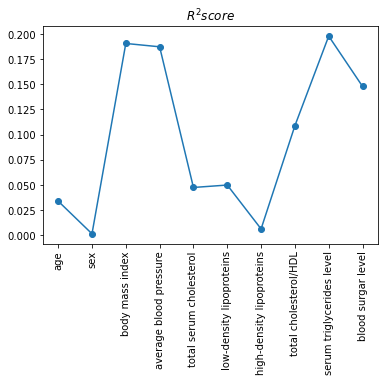

In [45]:
plt.plot(xcol, r2, marker ='o')
plt.xticks(rotation=90)
plt.title("$R^2 score$")
plt.show()

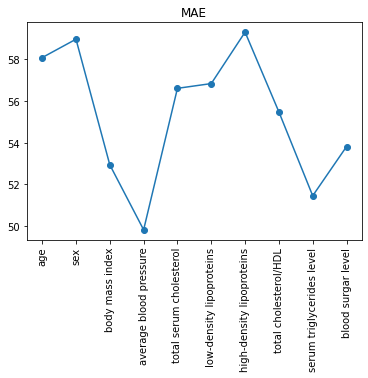

In [46]:
plt.plot(xcol, mae_test, marker ='o')
plt.xticks(rotation=90)
plt.title("MAE")
plt.show()

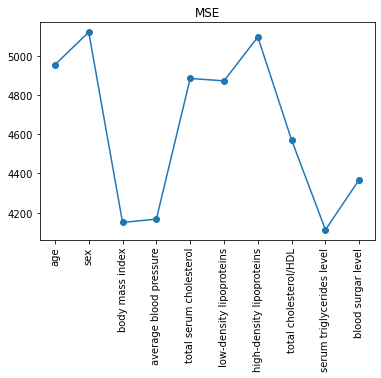

In [47]:
plt.plot(xcol, mse_test, marker ='o')
plt.xticks(rotation=90)
plt.title("MSE")
plt.show()

## 3.2. Task 2:  Data preparation

The values of the 10 features have been centered around the mean and scaled by the standard deviation multiplied by the number of samples.

In regression, Subtracting the mean typically improves the interpretation of main effects in the presence of interactions, and dividing by the stan- dard deviation puts all predictors on a common scale.
http://www.stat.columbia.edu/~gelman/research/unpublished/standardizing.pdf


Each feature has its own variation with respect to samples. so centering will project the data in a similar region. 
After centered around mean, dividing by std deviation will give us the data which has  deviations from the mean in standard deviation units.

## 3.3 Task 3:  Model prediction

**a) How well does the linear regression model work for each of the 10 features?**

In the task 3.1, the plots for evaluation 
- Body mass index, average blood pressure, serum triglycerides level, blood surgar level  has higher $R^2$ scores , means these properties are the most important in determining and explaning the behavior of y -values. 'Total chalestrol' also have relatively higher score.

- Also for MAE, MSE, the test prediction has lowest values for these attributes, which means with these attributes the trained model is predicting correctly.

Both above behavior depicts that these 5 atributes would be important for prediction.




**b) Which of the attributes can be reasonably  fitted with a linear model?**
- Body mass index, 
- Average blood pressure
- serum triglycerides level,
- blood surgar level

**c) For which is the linear model not appropriate?**

Age, sex, total serum cholestrol, low density lipoproteins, total cholestrol/HDL
- $R^2$ scores : low, 
- mse, mae : high 

**d) Provide a discussion of your results and give reasons for your conclusions.**

Body mass index, average blood pressure, serum triglycerides level, blood surgar level, Total chalestrol are  important features for prediction as per linear regression model due to $R^2$ scores, MAE, and MSE values. 